#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
#### zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
#### Произвести расчет как с использованием intercept, так и без.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.DataFrame({'zp': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],\
                   'ks': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})

$$b = \frac{\overline{yx} - \overline{y} \cdot \overline{x}}{\overline{x^2} - (\overline{x})^2}$$
$$a = \overline{y} - b \cdot (\overline{x})^2$$

In [2]:
b = (np.mean(df.zp * df.ks) - np.mean(df.zp) * np.mean(df.ks)) / (np.mean(df.zp**2) - np.mean(df.zp) ** 2)
a = np.mean(df.ks) - b * np.mean(df.zp)
print(f'y = {a} + {b}x')

y = 444.1773573243596 + 2.620538882402765x


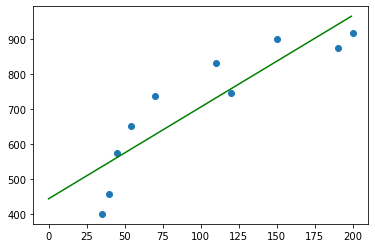

In [3]:
plt.scatter(df.zp, df.ks)
t = np.arange(0, 200, 1)
v = a + b * t
plt.plot(t, v, color='g')

$$\hat{B} = (X^T \times X)^{-1} \times X^T \times Y$$

In [4]:
X = df.zp.values.reshape((10,1))
y = df.ks.values.reshape((10,1))

np.linalg.inv(X.T @ X) @ X.T @ y

array([[5.88982042]])

In [5]:
X = df.zp.values.reshape((10,1))
X = np.hstack([np.ones((10, 1)), X])
y = df.ks.values.reshape((10,1))

np.linalg.inv(X.T @ X) @ X.T @ y

array([[444.17735732],
       [  2.62053888]])

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [12]:
X = df.zp.values
y = df.ks.values

w1 = 0.1
alpha = 1e-6
epsilon = 1
n = X.shape[0]
i = 0

while abs(epsilon) > alpha:
    w_prev = w1
    w1 -= alpha * (2/n) * np.sum((w1 * X - y) * X)
    epsilon = w_prev - w1
    i += 1

print(f'y = {w1} * x. Коэффициент найден за {i} итераций, с точностью {alpha}.')

y = 5.8897853464590435 * x. Коэффициент найден за 430 итераций, с точностью 1e-06.


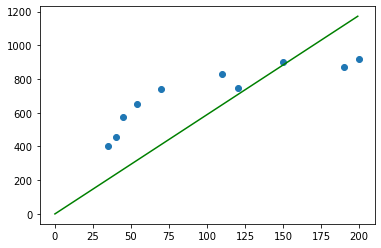

In [13]:
plt.scatter(df.zp, df.ks)
t = np.arange(0, 200, 1)
v = w1 * t
plt.plot(t, v, color='g')

#### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [14]:
w0 = 442
w1 = 0.1
alpha = 1e-6
epsilon0 = 1
epsilon1 = 1
n = X.shape[0]
i = 0

while abs(epsilon0) > alpha or abs(epsilon1) > alpha:
    w0_prev = w0
    w1_prev = w1
    w1 -= alpha * (2/n) * np.sum((w0 + w1 * X - y) * X)
    w0 -= alpha * (2/n) * np.sum((w0 + w1 * X - y))
    epsilon0 = w0_prev - w0
    epsilon1 = w1_prev - w1
    i += 1

print(f'y = {w0} + {w1} * x. Коэффициент найден за {i} итераций, с точностью {alpha}.')

y = 442.2061503441162 + 2.635047837298424 * x. Коэффициент найден за 179563 итераций, с точностью 1e-06.


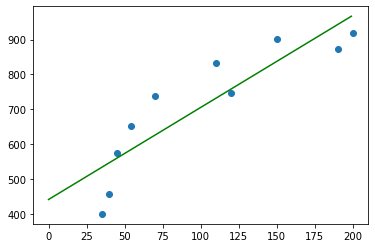

In [15]:
plt.scatter(df.zp, df.ks)
t = np.arange(0, 200, 1)
v = w0 + w1 * t
plt.plot(t, v, color='g')